In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import csv

In [2]:
#choose stocks with highest RoE
stocklist = []
stocks_name = []
stocksroe = []

with open ('list_stocks.csv', 'rt') as stocks_csv: #read the companies of s&p 500
    reader = csv.reader(stocks_csv)
    for i in stocks_csv:
        line = i.split(';')
        stocklist.append(line[1].strip())
        stocks_name.append(line[0].strip())


def RoE(ticker):
    data = yf.Ticker(ticker)
    roe = data.info['returnOnEquity'] #roe
    name = data.info['shortName'] #company name
    symbol = data.info['symbol'] #symbol
    roe_list = [name, symbol, roe]
    if roe_list not in stocksroe:
        stocksroe.append(roe_list)
    print(name, ":", roe)

def main():
    for i in stocklist:
        RoE(i)

if __name__ == "__main__":
    main()

KeyError: 'returnOnEquity'

In [ ]:
sorted_roe = sorted(stocksroe, key=lambda x: str(x[2]), reverse=True)
top_companies = []
for x in sorted_roe:
    if x[2] != None:
        top_companies.append(x)
top_companies = list(map(lambda x: x[1], sorted_roe[0:5]))

stocks = top_companies
weights = [0.2, 0.2, 0.2, 0.2, 0.2] #percentage of the components in portfolio

historical_data = yf.download(stocks, start='2018-01-01') #download data from date selected

close_price = historical_data['Close'].pct_change() #percentage of return between open price and close price
portfolio_return = (close_price * weights).sum(axis=1)
cumulative_return = (portfolio_return + 1).cumprod()

[*********************100%***********************]  5 of 5 completed


Date
2018-01-02    1.000000
2018-01-03    1.004586
2018-01-04    1.006914
2018-01-05    1.021177
2018-01-08    1.020599
dtype: float64

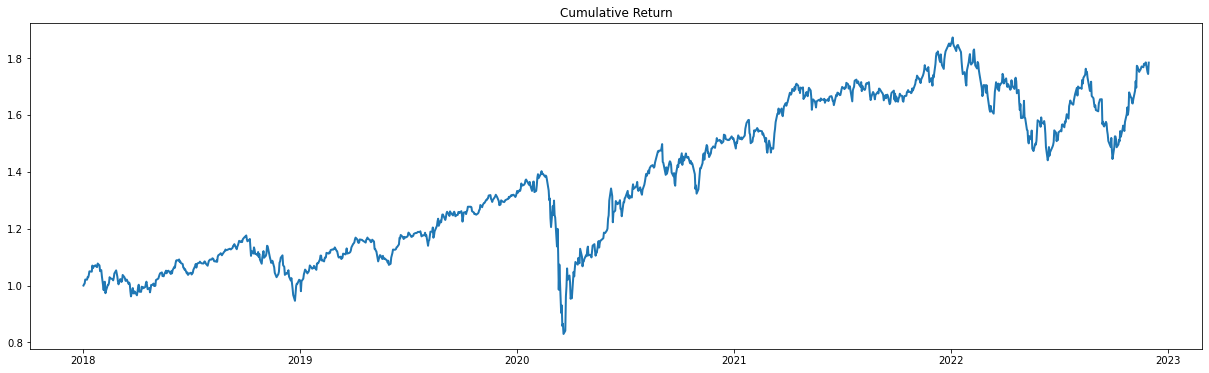

In [ ]:
#data visualization
x = cumulative_return.keys()
y = cumulative_return

fig, ax = plt.subplots(figsize=(21,6))
ax.plot(x, y, linewidth=2.0)
ax.set_title('Cumulative Return')

plt.show()

In [ ]:
portfolio_weights=[]
portfolio_returns=[]
portfolio_risk=[]
portfolio_sharpe=[]

def optimization(close):
    random_stocks = np.random.uniform(size=len(close.columns))
    random_stocks = random_stocks / np.sum(random_stocks)

    portfolio_weights.append(random_stocks) #portfolio percentage

    mean = (close.mean() * random_stocks).sum() * 252 #return
    portfolio_returns.append(mean)

    volatility = (close * random_stocks).sum(axis=1) #portfolio risk 
    annual_std = np.std(volatility) * np.sqrt(252)
    portfolio_risk.append(annual_std)

    sharpe_ratio = (np.mean(volatility) / np.std(volatility)) * np.sqrt(252)
    portfolio_sharpe.append(sharpe_ratio)


count = 1000
for k in range(0, count):
    optim = optimization(close_price)

In [ ]:
# El Ratio de Sharpe es la rentabilidad que ofrece una inversión por cada unidad de riesgo que asume.
max_sharpe_ratio = np.argmax(portfolio_sharpe)
max_portfolio_weights = portfolio_weights[max_sharpe_ratio]
print(f"Max sharpe ratio: {portfolio_sharpe[max_sharpe_ratio]}")

print("portfolio")
for i in range(len(max_portfolio_weights)):
    print(close_price.columns[i], max_portfolio_weights[i])


Max sharpe ratio: 0.9063486703119318
portfolio
AAPL 0.5808098007074763
AMGN 0.13714960422186034
BA 0.005692757996332784
HD 0.09665354798613172
MCD 0.17969428908819876


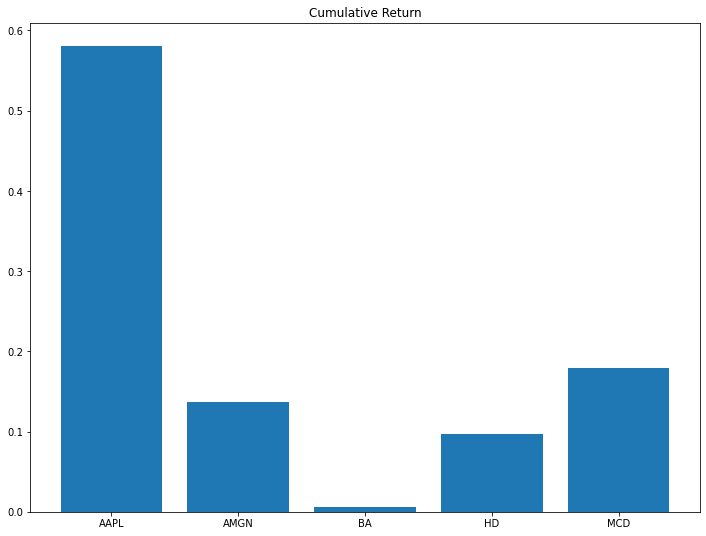

In [ ]:
#Portfolio Composition with max sharpe ratio
#data 
x = close_price.columns
y = max_portfolio_weights

fig, ax = plt.subplots(figsize=(12,9))
ax.bar(x, y)
ax.set_title('Cumulative Return')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

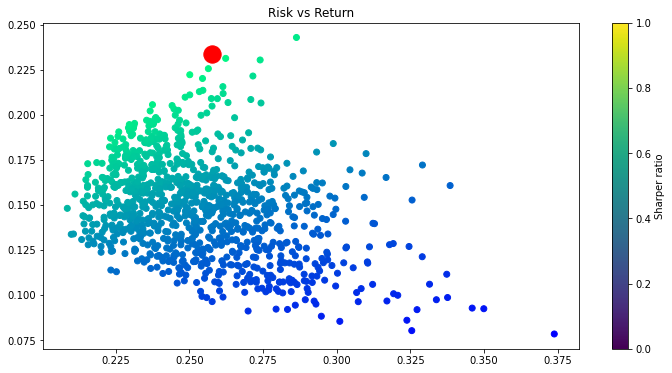

In [ ]:
# Efficient Frontier
max_ratio = max_sharpe_ratio

x = portfolio_risk
y = portfolio_returns


fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, c=portfolio_sharpe, cmap='winter') #Efficient Frontier between risk and return
ax.set_title('Risk vs Return')

plt.scatter(x[max_ratio], y[max_ratio], color='r', marker='o', s=300) #sharpe ratio
plt.colorbar(label='Sharper ratio')

plt.show

In [ ]:
#Data of all stocks

stocks = stocklist
weights = []
for i in range(0,len(stocklist)):
    weights.append(100/len(stocklist))
    
historical_data = yf.download(stocks, start='2018-01-01') #download data from date selected
close_price = historical_data['Close'].pct_change() #percentage of return between open price and close price

# data for Power BI
close_price.to_csv('p_pct_change.csv')
historical_data['Close'].to_csv('p_close.csv')

portfolio_return = (close_price * weights).sum(axis=1)
cumulative_return = (portfolio_return + 1).cumprod()

portfolio_weights=[]
portfolio_returns=[]
portfolio_risk=[]
portfolio_sharpe=[]

def optimization(close):
    random_stocks = np.random.uniform(size=len(close.columns))
    random_stocks = random_stocks / np.sum(random_stocks)

    portfolio_weights.append(random_stocks) #portfolio percentage

    mean = (close.mean() * random_stocks).sum() * 252 #return
    portfolio_returns.append(mean)

    volatility = (close * random_stocks).sum(axis=1) #portfolio risk 
    annual_std = np.std(volatility) * np.sqrt(252)
    portfolio_risk.append(annual_std)

    sharpe_ratio = (np.mean(volatility) / np.std(volatility)) * np.sqrt(252)
    portfolio_sharpe.append(sharpe_ratio)


count = 1000
for k in range(0, count):
    optim = optimization(close_price)

[*********************100%***********************]  29 of 29 completed


In [ ]:
# save files to power BI
def savecsv(filename, header, rows):
    with open (filename, "w", newline='' ,encoding='utf-8') as file:

        write = csv.writer(file)
        write.writerow(header)
        write.writerows(rows)

# portfolio weights
column_name = close_price.columns.to_list()
for i in ['Sharpe', 'returns', 'risk']:
    column_name.append(i)

datacsv1 = []

for i in range(len(portfolio_weights)):
    data = np.append(portfolio_weights[i], [portfolio_sharpe[i], portfolio_returns[i],portfolio_risk[i]])
    datacsv1.append(data)

savecsv("p_weights.csv", column_name, datacsv1)
